# Loan Prosper Data Exploration

## Preliminary Wrangling

> This data set contains data about 113,937 with 81 attribute for each loan including loan amount, monthly payment, borroweAPR( Annual Percentage Rate) and many other data for the sake of this project i will select 14 variables that i will use to find factors that affects borrowerAPR and loanStatus and explore each variable through Univariate, bivariate and multivariate visualizations to explore if there is any useful insights in the data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
loan_data = pd.read_csv("prosperLoanData.csv")
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

> The Data consists of 113,937 rows and 81 columns.

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest in this data are Loan Status and BorrowerAPR as i will explore factors that affects this two features and what might be useful to predict Loan Outcome and BorrowerAPR. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that can support in the investigation includes:
- Prosper score
- Monthly loan payment
- Loan Original Amount
- Income Range
- IncomeVerifiable
- Listings category
- Credit score upper and lower range
- AvailableBankcardCredit
- Loan Creation Date
- Employment Status
- Employment Duration

## Data Cleaning
In this section i will remove columns that aren't needed in the exploration phase and will fix any tidiness or quality issues in the data.

- Remove unneccessary columns

In [4]:
loan_data.drop(loan_data.columns.difference(['ListingKey','LoanOriginalAmount','ListingCreationDate','LoanStatus','BorrowerAPR','ListingCategory (numeric)','EmploymentStatus', 'EmploymentStatusDuration','IncomeRange','ProsperScore','CreditScoreRangeLower','CreditScoreRangeUpper','MonthlyLoanPayment','AvailableBankcardCredit']),1, inplace =True)

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingKey                 113937 non-null  object 
 1   ListingCreationDate        113937 non-null  object 
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerAPR                113912 non-null  float64
 4   ProsperScore               84853 non-null   float64
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   EmploymentStatus           111682 non-null  object 
 7   EmploymentStatusDuration   106312 non-null  float64
 8   CreditScoreRangeLower      113346 non-null  float64
 9   CreditScoreRangeUpper      113346 non-null  float64
 10  AvailableBankcardCredit    106393 non-null  float64
 11  IncomeRange                113937 non-null  object 
 12  LoanOriginalAmount         113937 non-null  int64  
 13  MonthlyLoanPayment         11

- Drop Nan Values as there isn't much of them so they won't affect our data.

In [6]:
loan_data.dropna(inplace =True)

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84834 entries, 1 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingKey                 84834 non-null  object 
 1   ListingCreationDate        84834 non-null  object 
 2   LoanStatus                 84834 non-null  object 
 3   BorrowerAPR                84834 non-null  float64
 4   ProsperScore               84834 non-null  float64
 5   ListingCategory (numeric)  84834 non-null  int64  
 6   EmploymentStatus           84834 non-null  object 
 7   EmploymentStatusDuration   84834 non-null  float64
 8   CreditScoreRangeLower      84834 non-null  float64
 9   CreditScoreRangeUpper      84834 non-null  float64
 10  AvailableBankcardCredit    84834 non-null  float64
 11  IncomeRange                84834 non-null  object 
 12  LoanOriginalAmount         84834 non-null  int64  
 13  MonthlyLoanPayment         84834 non-null  fl

Convert Listing Category from numeric to Strings

In [8]:
loan_data.rename(columns={'ListingCategory (numeric)': 'ListingCategory'}, inplace=True)
ListingCategory_strings = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure','Engagement Ring', 'Green Loans','Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV','Taxes', 'Vacation','Wedding Loans'
]

def To_string(listingCategory):
    return ListingCategory_strings[listingCategory]
loan_data['ListingCategory'] =  loan_data.ListingCategory.apply(To_string)

In [9]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84834 entries, 1 to 113936
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ListingKey                84834 non-null  object 
 1   ListingCreationDate       84834 non-null  object 
 2   LoanStatus                84834 non-null  object 
 3   BorrowerAPR               84834 non-null  float64
 4   ProsperScore              84834 non-null  float64
 5   ListingCategory           84834 non-null  object 
 6   EmploymentStatus          84834 non-null  object 
 7   EmploymentStatusDuration  84834 non-null  float64
 8   CreditScoreRangeLower     84834 non-null  float64
 9   CreditScoreRangeUpper     84834 non-null  float64
 10  AvailableBankcardCredit   84834 non-null  float64
 11  IncomeRange               84834 non-null  object 
 12  LoanOriginalAmount        84834 non-null  int64  
 13  MonthlyLoanPayment        84834 non-null  float64
dtypes: fl

I will change credit score ranges from upper and lower to average scores and store them in creditScore column

In [10]:
loan_data['CreditScore'] = (loan_data.CreditScoreRangeLower + loan_data.CreditScoreRangeUpper) / 2

In [11]:
loan_data.describe()

,BorrowerAPR,ProsperScore,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,AvailableBankcardCredit,LoanOriginalAmount,MonthlyLoanPayment,CreditScore
count,84834.000000,84834.000000,84834.000000,84834.000000,84834.000000,84834.000000,84834.000000,84834.000000,84834.000000
mean,0.226655,5.950032,103.055320,699.395997,718.395997,11401.845015,9083.936606,291.944727,708.895997
std,0.079917,2.376553,97.078884,47.096030,47.096030,18611.765407,6287.680594,186.676629,47.096030
min,0.045830,1.000000,0.000000,600.000000,619.000000,0.000000,1000.000000,0.000000,609.500000
25%,0.163280,4.000000,30.000000,660.000000,679.000000,1148.000000,4000.000000,157.330000,669.500000
50%,0.219450,6.000000,74.000000,700.000000,719.000000,4575.000000,7500.000000,251.940000,709.500000
75%,0.292540,8.000000,148.000000,720.000000,739.000000,13911.750000,13500.000000,388.350000,729.500000
max,0.423950,11.000000,755.000000,880.000000,899.000000,498374.000000,35000.000000,2251.510000,889.500000


Convert ListingCreationDate to datetime type and extract year and month only in a new column

In [12]:
loan_data['YearMonth'] = pd.to_datetime(loan_data.ListingCreationDate).dt.strftime('%Y-%m')

In [13]:
loan_data.sort_values(by= 'ListingCreationDate', inplace=True)

In [14]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84834 entries, 39013 to 14131
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ListingKey                84834 non-null  object 
 1   ListingCreationDate       84834 non-null  object 
 2   LoanStatus                84834 non-null  object 
 3   BorrowerAPR               84834 non-null  float64
 4   ProsperScore              84834 non-null  float64
 5   ListingCategory           84834 non-null  object 
 6   EmploymentStatus          84834 non-null  object 
 7   EmploymentStatusDuration  84834 non-null  float64
 8   CreditScoreRangeLower     84834 non-null  float64
 9   CreditScoreRangeUpper     84834 non-null  float64
 10  AvailableBankcardCredit   84834 non-null  float64
 11  IncomeRange               84834 non-null  object 
 12  LoanOriginalAmount        84834 non-null  int64  
 13  MonthlyLoanPayment        84834 non-null  float64
 14  Cr

In [15]:
loan_data.head()

,ListingKey,ListingCreationDate,LoanStatus,BorrowerAPR,ProsperScore,ListingCategory,EmploymentStatus,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,AvailableBankcardCredit,IncomeRange,LoanOriginalAmount,MonthlyLoanPayment,CreditScore,YearMonth
39013,C1F93457067817167C1F85C,2009-07-13 18:01:24.347000000,Completed,0.09221,10.0,Other,Retired,244.0,820.0,839.0,27800.0,"$25,000-49,999",3500,108.31,829.5,2009-07
18374,379D345841763444397B962,2009-07-13 18:04:40.220000000,Completed,0.18183,9.0,Debt Consolidation,Full-time,21.0,640.0,659.0,4755.0,"$25,000-49,999",3500,123.05,649.5,2009-07
48139,5622345861892608675B9E8,2009-07-13 19:08:45.763000000,Defaulted,0.26272,8.0,Debt Consolidation,Full-time,5.0,640.0,659.0,2788.0,"$25,000-49,999",5000,196.11,649.5,2009-07
47705,FC23345849511819320B882,2009-07-13 19:09:37.827000000,Completed,0.10234,10.0,Other,Full-time,61.0,820.0,839.0,182687.0,"$1-24,999",1000,30.76,829.5,2009-07
8072,598D34578806480944F5175,2009-07-13 19:19:50.213000000,Completed,0.05525,10.0,Other,Full-time,43.0,780.0,799.0,82458.0,"$50,000-74,999",1000,30.06,789.5,2009-07


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Distribution of Loan Status

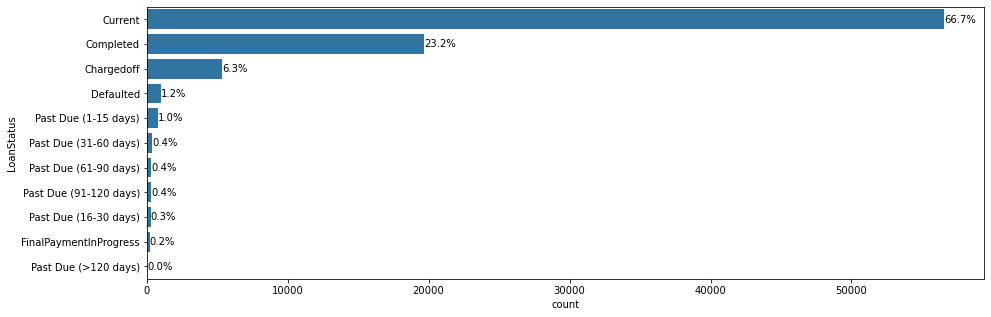

In [16]:
plt.figure(figsize= (15, 5))
sb.countplot(data= loan_data, y='LoanStatus', color=sb.color_palette()[0], order=loan_data.LoanStatus.value_counts().index)


locs, labels = plt.yticks()
for loc, label in zip(locs, labels):
    count = loan_data.LoanStatus.value_counts()[label.get_text()]
    
    percentage = '{:0.1f}%'.format(count / loan_data.shape[0] * 100)
    
    plt.text(count + 2, loc, percentage, verticalalignment = 'center', color = 'black')

From the countplot we see that two thirds of people are currently enrolled in a loan and that around only 8% of people is charged off or defaulted

### Distribution of Borrower annual percentage rate(APR)

In [17]:
loan_data.BorrowerAPR.describe()

count    84834.000000
mean         0.226655
std          0.079917
min          0.045830
25%          0.163280
50%          0.219450
75%          0.292540
max          0.423950
Name: BorrowerAPR, dtype: float64

In [18]:
loan_data.BorrowerAPR.value_counts()

0.35797    3671
0.35643    1644
0.30532     902
0.29510     747
0.35356     720
           ... 
0.26209       1
0.10655       1
0.14608       1
0.38230       1
0.18875       1
Name: BorrowerAPR, Length: 2329, dtype: int64

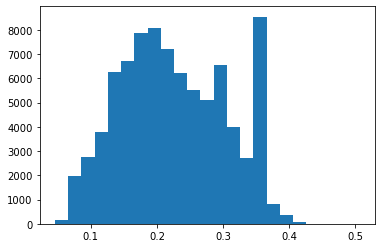

In [19]:
bins = np.arange(loan_data.BorrowerAPR.min(), loan_data.BorrowerAPR.max() + 0.1, 0.02)
plt.hist(data=loan_data, x='BorrowerAPR', bins= bins);

The histogram of borrowerAPR is nearly unimodal with its peak around 0.2 with high frequency at around 0.35 and sudden decrease at values lower than 0.1

### Distrubtion of creation date with years and months only

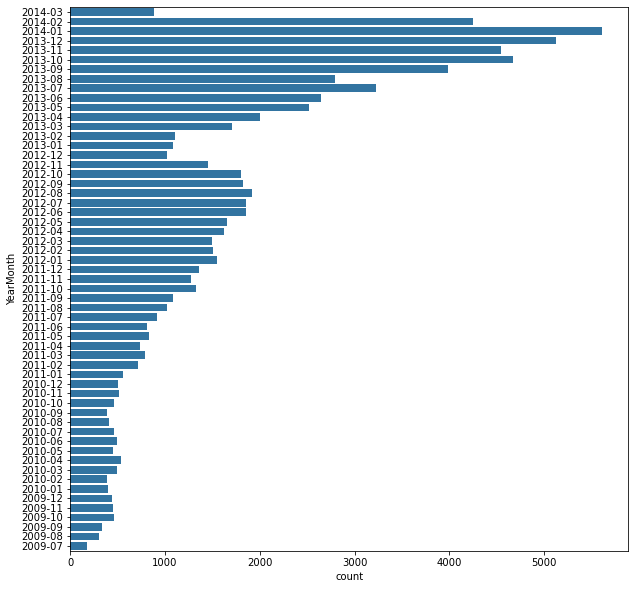

In [20]:
plt.figure(figsize=(10,10))
sb.countplot(data=loan_data, y='YearMonth', color=sb.color_palette()[0]);
plt.gca().invert_yaxis()

From the previous barchart we see that the number of loans incresaed through years hitting its maximum at january 2014

### Distribution of Listing Category

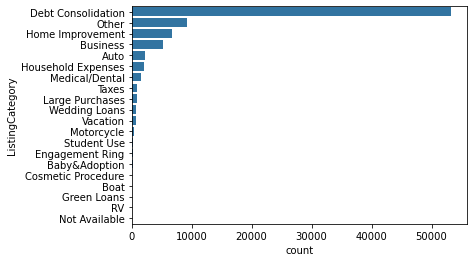

In [21]:
sb.countplot(data = loan_data, y='ListingCategory', color=sb.color_palette()[0], order= loan_data.ListingCategory.value_counts().index);

We see that the most common cause for loans are debt consolidation followed by Unknown reasons and then Home improvement.

### Distrubtion of Credit score

In [22]:
loan_data.CreditScore.value_counts()

669.5    14130
689.5    14015
709.5    13607
729.5    11033
649.5     8846
749.5     7870
769.5     5252
789.5     3705
809.5     2107
629.5     1650
829.5     1042
609.5     1040
849.5      398
869.5      122
889.5       17
Name: CreditScore, dtype: int64

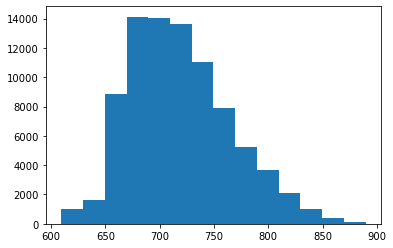

In [23]:
bins = np.arange(loan_data.CreditScore.min(), loan_data.CreditScore.max() + 10, 20)
plt.hist(data=loan_data, x='CreditScore', bins=bins);

CreditScore histogram looks slightly right skewed wiht its peak at around 700 and with sudden decrease in values less than 650

### Distribution of Prosper Score

In [24]:
loan_data.ProsperScore.value_counts()

4.0     12593
6.0     12274
8.0     12052
7.0     10595
5.0      9809
3.0      7641
9.0      6908
2.0      5765
10.0     4749
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

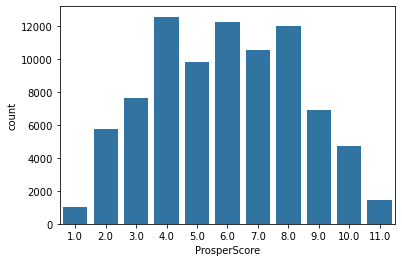

In [25]:
sb.countplot(data=loan_data, x='ProsperScore', order = loan_data.ProsperScore.sort_values().unique(), color=sb.color_palette()[0]);

We see that prosper score have nearly normal distribution as most people have prosper score from 4 to 8

### Distribution of Income Ranges

In [26]:
loan_data.IncomeRange.value_counts()

$50,000-74,999    25623
$25,000-49,999    24167
$100,000+         15202
$75,000-99,999    14496
$1-24,999          4652
Not employed        649
$0                   45
Name: IncomeRange, dtype: int64

Change "Not displayed" and "Not employed" values to '$0'

In [27]:
loan_data.IncomeRange.replace(to_replace=['Not displayed', 'Not employed'], value='$0', inplace=True)
loan_data.IncomeRange.value_counts()

$50,000-74,999    25623
$25,000-49,999    24167
$100,000+         15202
$75,000-99,999    14496
$1-24,999          4652
$0                  694
Name: IncomeRange, dtype: int64

Convert IncomeRange to categorical ordered variable

In [28]:
IncomeClass= pd.api.types.CategoricalDtype(ordered=True, categories=['$0' , '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'])
loan_data.IncomeRange = loan_data.IncomeRange.astype(IncomeClass)
loan_data.IncomeRange.value_counts()

$50,000-74,999    25623
$25,000-49,999    24167
$100,000+         15202
$75,000-99,999    14496
$1-24,999          4652
$0                  694
Name: IncomeRange, dtype: int64

Plot the distrubtion of IncomeRanges using seaborn countplot and relative frequncies

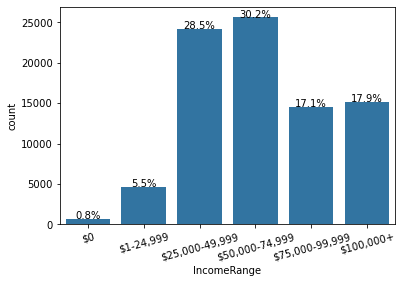

In [29]:
sb.countplot(data=loan_data, x='IncomeRange', color=sb.color_palette()[0]);


locs, labels = plt.xticks(rotation=15);

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = loan_data.IncomeRange.value_counts()[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/loan_data.shape[0])

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

From the previous countplot we see that nearly more than 30% of people have income that ranges from 50,000 - 74,999 USD and that only around 0.8% of people have income of 0 USD

### The distrubtion of loan original amount

In [30]:
loan_data.LoanOriginalAmount.value_counts()

4000     13230
15000    11458
10000     9815
2000      4590
5000      4221
         ...  
19950        1
1575         1
5733         1
11938        1
8196         1
Name: LoanOriginalAmount, Length: 1934, dtype: int64

In [31]:
loan_data.LoanOriginalAmount.describe()

count    84834.000000
mean      9083.936606
std       6287.680594
min       1000.000000
25%       4000.000000
50%       7500.000000
75%      13500.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

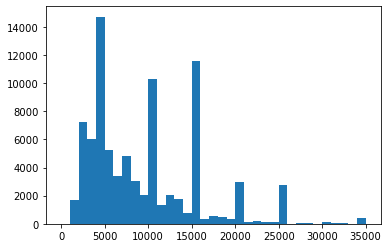

In [32]:
bins = np.arange(0, loan_data.LoanOriginalAmount.max() + 100, 1000)
plt.hist(data=loan_data, x='LoanOriginalAmount', bins=bins);

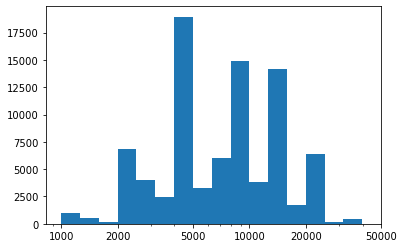

In [33]:
bins_log = 10 ** np.arange(np.log10(loan_data.LoanOriginalAmount.min()), np.log10(loan_data.LoanOriginalAmount.max()) + 0.1, 0.1)
plt.hist(data= loan_data, x='LoanOriginalAmount', bins=bins_log)
plt.xscale('log')
ticks = [1000, 2000, 5000,10000,20000, 50000]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels);

From the previous histogram we see that data is skewed to the right with few points that have higher frequncies than others like less than 5000, 10000, 15000, 20000 and 25000 this points may indicate that loan amount might have standards that force people to take multiplies of 5000 or that people are more likely to take multiple of 5000USD.
After Doing a log Tranformation the distribution is not right skewed but the same observations is found.

### The distribution of Monthly Loan Payment

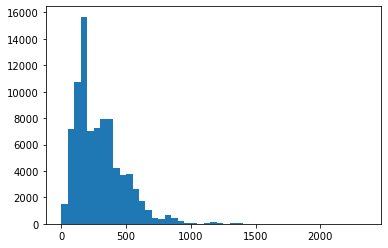

In [34]:
bins = np.arange(0, loan_data.MonthlyLoanPayment.max()+ 100, 50)
plt.hist(data=loan_data, x='MonthlyLoanPayment', bins=bins);

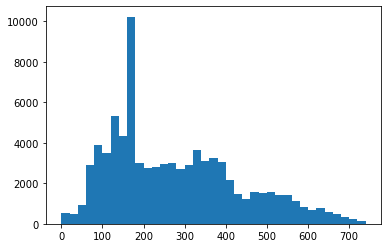

In [35]:
bins_zoom = np.arange(0, 750, 20)
plt.hist(data=loan_data, x='MonthlyLoanPayment', bins=bins_zoom);

From the previous two histograms we find that monthly loan payments have some outliers above 1000 with most data having values from 0 to 750 so by zooming on this area we find that the distribution of Monthly loan payment have a very high frequency at values between 100 and 200 while the rest of distrubtion is near normal

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Borrower APR distribution had a nearly unimodal but with a high peak at around 0.35 and a sudden decrease in frequency for values less than 0.1

>Loan Status distribution showed that nearly two thirds of people are currently paying a loan with only about 8% of people having charged off or defaulted the loan.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Listing category variable was transformed from integer to the corresponding categories to make visualizations easier to understand and then a countplot was created that showed that nearly more than 50% of people take loans for debt consolidation.

> Income Range variable was not ordered so using pandas api library i converted it to categorical ordered variable to facilitate further explorations using this variable.

> Distribution of monthly loans showed that most people have monthly loan payment that range from 100 to 700 with a huge peak at around 200 while there were some outliers above 1000 USD.

> Distribution of original loan amount variable showed that most loans have values around 5000, 10000 and 15000 and it was right skewed so after transforming a log transform the distribution was not right skewed but the same observations was found.

> Listing creation date variable was converted to datetime and dataframe was sorted by date and month and year was extracted from the date in a new column YearMonth to make visualizations easier finally the countplot of years and months showed that the number of loans have been increasing steadily from 2009 to 2014 and reached its peak at january 2014.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### The relationship between BorrowerAPR and ProsperScore

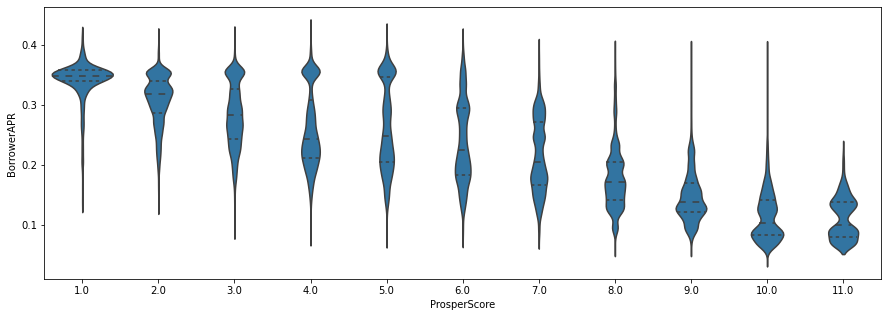

In [198]:
plt.figure(figsize=(15, 5))
sb.violinplot(data=loan_data, x='ProsperScore', y='BorrowerAPR', inner='quartile', color=sb.color_palette()[0]);

Based on the previous plot we see that as the prosper score increases the borrowerAPR tends to decrease as indicated by the median of values and the distrubtion of values associated with each prosper score

### The relationship between BorrowerAPR and IncomeRange

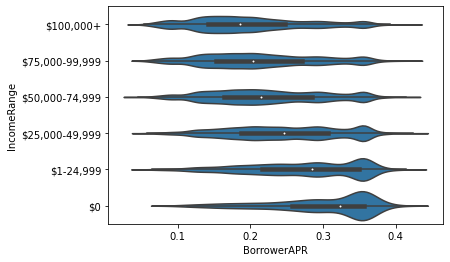

In [143]:
sb.violinplot(data=loan_data, y='IncomeRange', x='BorrowerAPR', color=sb.color_palette()[0]);
plt.gca().invert_yaxis()

### The relationship between IncomeRange and prosper score

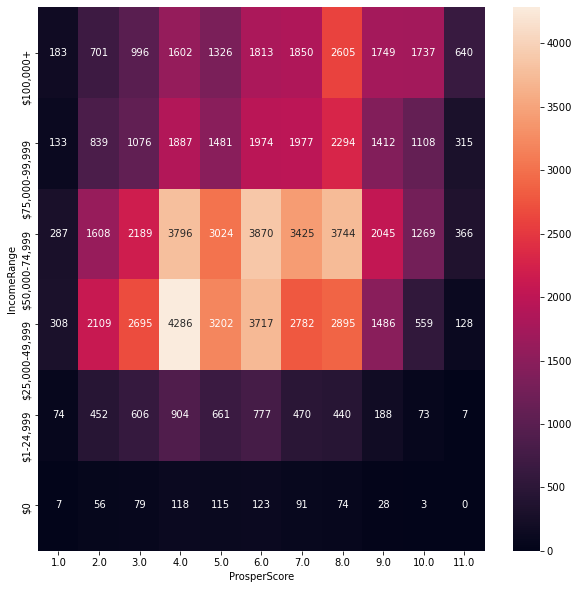

In [142]:
counts = loan_data.groupby(['IncomeRange','ProsperScore']).size()
counts = counts.reset_index(name='Counts')
counts = counts.pivot(index='IncomeRange', columns='ProsperScore', values='Counts')
plt.figure(figsize=(10,10))
sb.heatmap(counts, annot=True, fmt='d');
plt.gca().invert_yaxis()

From the previous two plots we see that people who have higher income ranges have lower BorrowerAPRs and that is because people with higher income ranges have higher prosper scores which leads to lower borrowerAPRS

### The relationship between LoanOrginalAmount and creationDate with years and months

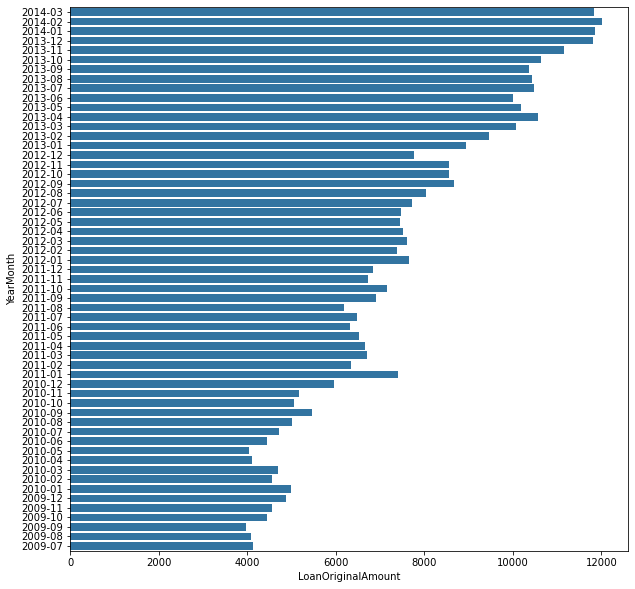

In [124]:
plt.figure(figsize=(10,10))
data = loan_data.groupby("YearMonth").mean().LoanOriginalAmount
data = data.reset_index()
sb.barplot(data=data, x='LoanOriginalAmount', y = 'YearMonth', color=sb.color_palette()[0]);
plt.gca().invert_yaxis()

From The previous bar plot we see that in recent years people started to take bigger loans on average than previous years with largest loans taken at 2-2014

### The relationship between loan status and borrowerAPR

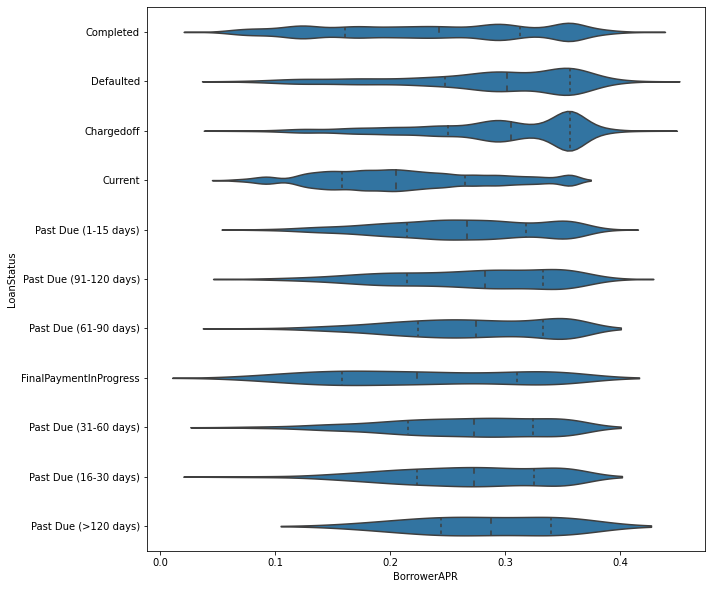

In [197]:
plt.figure(figsize=(10,10))
sb.violinplot(data=loan_data, y='LoanStatus', x='BorrowerAPR', inner='quartile', color=sb.color_palette()[0]);

From the previous violin plot we see that people who chargedOff or Defaulted had higher BorrowerAPRs than people who completed the loan which may indicate that higher borrowerAPRs might lead to more Chargeoffs

### The relationship between credit Score and prosperScore

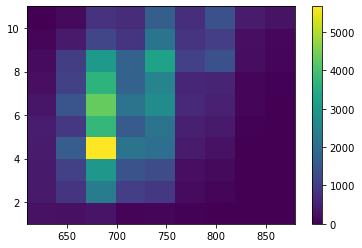

In [145]:
bins_x = np.arange(loan_data.CreditScore.min(), loan_data.CreditScore.max() + 10, 30)
bins_y = np.arange(loan_data.ProsperScore.min(), loan_data.ProsperScore.max() + 1, 1)
plt.hist2d(data=loan_data, x='CreditScore', y='ProsperScore', bins = [bins_x, bins_y]);
plt.colorbar();

From previous plot we see that as credit score increases prosperscore tends to increase with most people having prosper score of around 4 and credit score from 650 to 700

### The relationship between Loan status and  monthly loan payment 

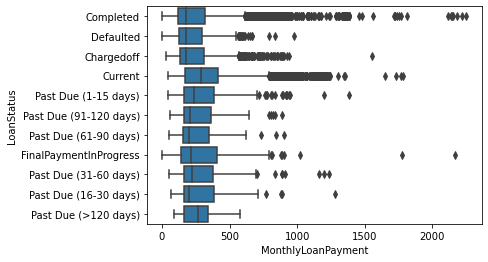

In [146]:
sb.boxplot(data=loan_data, y='LoanStatus', x='MonthlyLoanPayment', color=sb.color_palette()[0]);

### The relationship between loan status and loan original amount

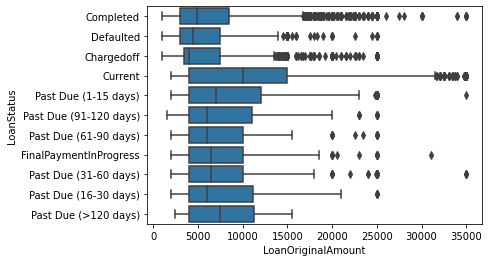

In [147]:
sb.boxplot(data=loan_data, x='LoanOriginalAmount', y= 'LoanStatus', color=sb.color_palette()[0]);

From the two box plots we see that people who charged off or defaulted had on average lower loan monthly payment and had smaller loan original amounts than people who completed thier loans

### The relationship between monthly loan payment and original loan amount

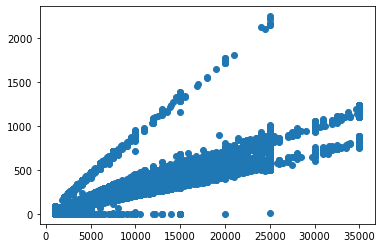

In [148]:
plt.scatter(data=loan_data, x='LoanOriginalAmount', y='MonthlyLoanPayment');

### The relationship between income ranges and Loan Original Amount

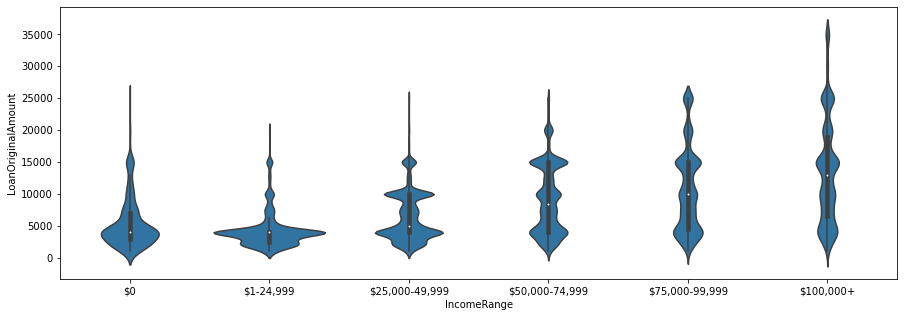

In [149]:
plt.figure(figsize=(15,5))
sb.violinplot(data=loan_data, x='IncomeRange', y='LoanOriginalAmount', color=sb.color_palette()[0]);

### The relationship between income range and monthly loan payment

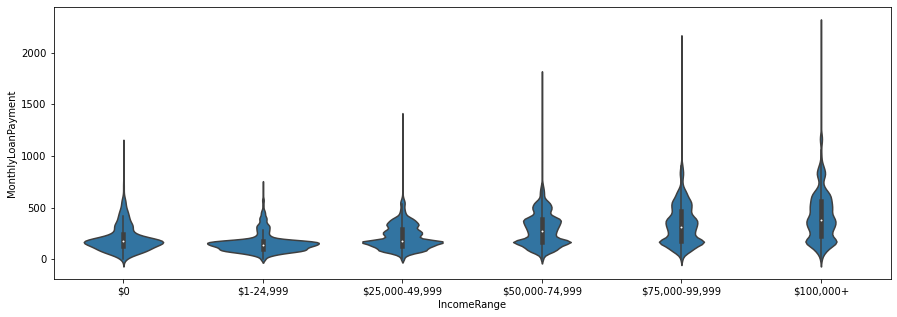

In [150]:
plt.figure(figsize=(15,5))
sb.violinplot(data=loan_data, x='IncomeRange', y='MonthlyLoanPayment', color=sb.color_palette()[0]);

From the previous three plots we see that as loan amount increases the monthly loan payment increases as well and that people with large income ranges have on average bigger loans and pay larger monthly payments.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> BorrowerAPR was found to be affected by prosper score as borrowerAPR had lower values for people with higher prosper scores while it had higher values for people who had lower prosper scores.

>BorrowerAPR had lower values as well for people who had higher income ranges(75000+ USD) while it had high values for people who had lower income ranges and this effect was because people who had higher income was observed to have higher prosper scores which lead to lower borrowerAPRs and people with lower incomes had lower prosper scores which lead to higher borrowerAPRs

> Loan status was found to be affected by borrowerAPR as higher borrowerAPRs lead to higher frequency of charging off or defaulting while lower values of borrowerAPRs was associated more frequency of completing the loan.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Income Range lead to higher prosper scores.

> people with higher income ranges tend to have bigger loans and pay larger monthly payments.

> Loan monthly payment was associated with loan amount as bigger loans lead to bigger monthly loan payments.

> as time progressed people tended to have bigger loans on average.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

The relationship between incomeRange, prosper score and BorrowerAPR

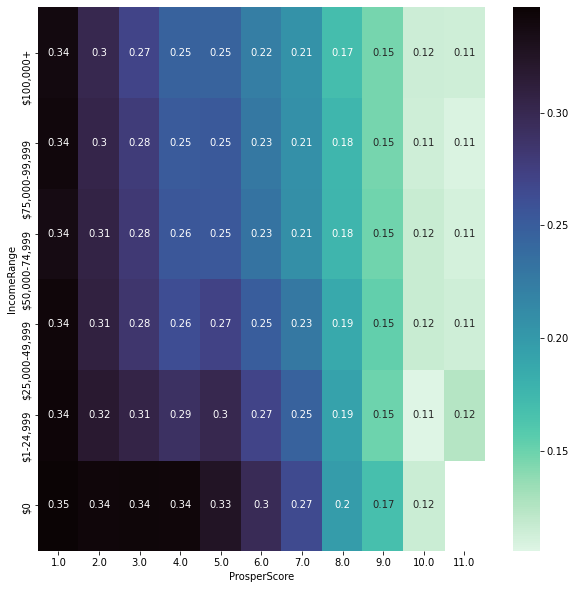

In [180]:
counts = loan_data.groupby(['IncomeRange','ProsperScore']).mean().BorrowerAPR
counts = counts.reset_index(name='BorrowerAPR_avg')
counts = counts.pivot(index='IncomeRange', columns='ProsperScore', values='BorrowerAPR_avg')
plt.figure(figsize=(10,10))
sb.heatmap(counts, annot=True, cmap='mako_r');
plt.gca().invert_yaxis()

This heatmap confirms that with higher income ranges people tend to have higher prosper scores which leads to lower BorrowerAPR

The relation between loan status, prosperscore and borrowerAPR

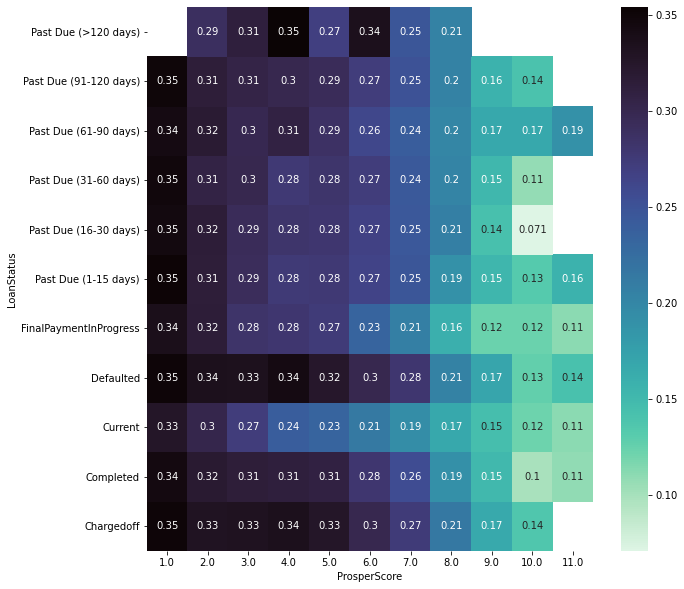

In [187]:
counts = loan_data.groupby(['LoanStatus','ProsperScore']).mean().BorrowerAPR
counts = counts.reset_index(name='BorrowerAPR_avg')
counts = counts.pivot(index='LoanStatus', columns='ProsperScore', values='BorrowerAPR_avg')
plt.figure(figsize=(10,10))
sb.heatmap(counts, annot=True, cmap='mako_r');
plt.gca().invert_yaxis()

From the heatmap we see that people who defaulted or ChargedOff have on average higher borrowerAPRs than people who completed the the loan regardless of the prosper score

The relation between income range, loan amount and monthly loan payment

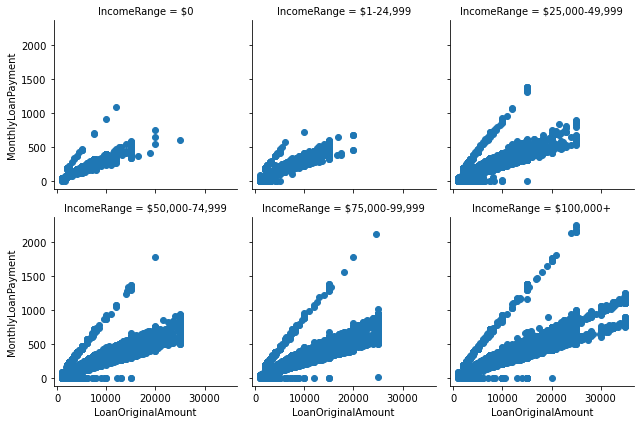

In [193]:
g = sb.FacetGrid(data= loan_data, col='IncomeRange', col_wrap=3)
g.map(plt.scatter, 'LoanOriginalAmount', 'MonthlyLoanPayment');

From the previous facet grid we see that larger loan amounts corresponds to larger monthly loan payments.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Income range and prosper score were found to lower BorrowerAPRs as higher income ranges was associated with higher prosper scores which lead to lower BorrowerAPRs.

> Loan Status was affected with borrowerAPR as charged off and defaulted people had higher borrowerAPR scores than peopled who completed or were currently in a loan regardless of the prosperscore

### Were there any interesting or surprising interactions between features?

> Yes, i found that loan amount and monthly loan payment have positive correlation regardless of income range

### Store the cleaned Data

In [196]:
loan_data.to_csv("cleaned_loan_data.csv")

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!